In [67]:
import numpy as np
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import math
import array
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

In [68]:
train = np.loadtxt('training.txt')
validate = np.loadtxt('validate.txt')
train = train-np.mean(train)
validate = validate-np.mean(validate)
N = train.shape[0]
Nv = validate.shape[0]
x = []
y = []
z = []
y_v = []
xx=np.arange(0,2996,1)
x_t = np.arange(0,3,0.001)
x_v = np.arange(0,3,0.003)
j1=[]

[ 0.00030199  0.00060398  0.00090597]


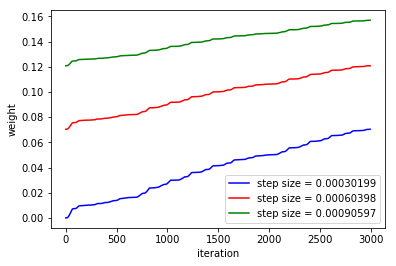

In [69]:
m = 4
X = np.zeros(shape=(m,N-m))
Y = train[m:N]  # Y is N-m*1 matrix
    #print(Y.shape)
for i in range(0,N-m):
    temp = train[i:i+m]
    X[:,i] = temp[::-1] # X is m*N-m matrix
R = X@X.T
value, vector = np.linalg.eig(R)
step_up = 1/max(value)
step = np.arange(step_up/3,step_up+step_up/4,step_up/3)
j=0
sum_rms = 0
w = np.zeros(shape=(m,1)) # w is m*1 matrix
for q in range(3):
    for iteration in range(0,N-m):
        #w = w + step[j]*(X[:,iteration].T@w-Y[iteration])*X[:,iteration]
        error = Y[iteration]-X[:,iteration].T@w
        J = step[j]*error*X[:,iteration]
        w[:,0] = w[:,0] + J.T
        jj = w.sum()/4
        j1.append(jj) 
print(step[0:3])
p1=plt.plot(xx,j1[0:2996],'b')
p2=plt.plot(xx,j1[2996:5992],'r')
p3=plt.plot(xx,j1[5992:8988],'g')
plt.xlabel('iteration')
plt.ylabel('weight')
plt.legend((p1[0],p2[0],p3[0]),('step size = 0.00030199', 'step size = 0.00060398','step size = 0.00090597'), fontsize=10)
        #print(w)
Xv = np.zeros(shape=(m,Nv-m))
Yv = validate[m:Nv]
for p in range(0,Nv-m):
    temp = train[p:p+m]
    Xv[:,p] = temp[::-1]
yv = w.T@Xv
#plt.plot(x_v[3:Nv],yv.T,'g')
#plt.xlabel('time')
#plt.title('predict validate data when m = 3 ')
#plt.show()
MSE = np.zeros(shape=(Nv-m,1))
for n in range(0,Nv-m):
    MSE[n] = (Yv[n] - yv.T[n])**2
x.append(m)
y.append(step[j])
z.append(MSE.sum()/(Nv-m))
#plt.plot(y,z,'r')
#plt.title('Filter Order m = 30')
#plt.xlabel('Step')
#plt.ylabel('MSE')
#plt.show()